## Descrição do Projeto 


Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.
Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)
O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro. (E: Todos, M: 17+, T: Adolescente, E10+: Todos 10+, K-A: 6 anos + Crianças a adultos (mudou para E), AO: Apenas Adultos 18+, EC: 3 anos+ (a ESRB mudou para E em 2018), RP: Pendente de Avaliação)



## Qual a melhor plataforma, gênero, mercado e classificação para um jogo?

Com os dados da loja online Ice, desejamos identificar as tendências do mercado, onde é o melhor investimento para o ano de 2017, quais são considerações sobre a plataforma mais lucrativa, como os mercados recebem as plataformas e gêneros diferentes. Como a nota dos críticos e dos usuários influenciam nas vendas. E se a classificação ESRB tem algum impacto




### Inicialização dos dados


In [1]:
#Carrgando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# Carregando Dataframe
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
# Informações do Dataframe
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Amostra dos dados
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Preparação dos dados


In [5]:
# Substituir os nomes das colunas (transformar tudo em minúsculos).
games_data.columns = list(map(lambda x: x.lower(), games_data.columns))
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Verificando valores da coluna user_score
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# Verificando valores da coluna year_of_release
games_data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
# Converta os dados para os tipos necessários.
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce') # As linhas 'tbd' viraram nulos
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


[Descreva as colunas onde os tipos de dados foram alterados e por quê.]

Os dados foram alterados em user_score pois são notas, e tranformados em valores numéricos é possível fazer análises de média, mediana, máximo, mínimo, enfim análises impossíveis para dados categóricos e que vão enriquecer o entendimento dos dados.

Os dados da coluna 'year_of_release' foram mantidos como float por ter valores nulos não é possível transformar em int, e não há ano que tenha valor diferente de 0 após o '.', portanto o tipo não interferirá na análise dos dados

### Tratando valores ausentes

In [9]:
# Valores ausentes em 'name'
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Substituindo valores nulos por 'Unknown'
games_data['name'].fillna('Unknown', inplace=True)

In [11]:
# Valores ausentes em 'genre'
games_data[games_data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# Substituindo valores nulos por 'Unknown'
games_data['genre'].fillna('Unknown', inplace=True)

In [13]:
# Valores ausentes em 'year_of_release'
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# Valores ausentes em 'rating'
games_data[games_data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Substituindo valores ausentes em 'rating' por 'RP'
games_data['rating'].fillna('RP', inplace=True)

[Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.]
As colunas 'name' e 'genre' tiveram os valores substituídos por 'Unknown' para preencher os valores nulos sem impactar na análise. A coluna 'year_of_release' permaneceu com os valores nulos por não ser possível preenche=la com algum valor numérico que não impacte a análise e o tipo de dado não poder ser inferido através de médias, medianas ou outro tipo de medida. Mesmo que em geral os jogos que tenham no nome um ano referência sejam lançados no ano anterior, ainda é relevante a quantidade de exceções a regra.

[Por que acha que os valores estão ausentes? Dê possíveis razões.]
Os dados estão ausentes devido ao registro na loja não ter sido registrado corretamente, no caso do nome pode ter algum caractere que deu erro, no caso do gênero pode ter acontecido de não saber categorizar, no caso do ano de lançamento pode ser que a pessoa não tinha certeza do ano de lançamento. Nas colunas de notas é possível que o jogo ainda não tenha uma nota. E na classificação indicativa a ERSB ainda não classificou o jogo.

[Preste atenção à abreviação TBD (a ser determinada). Especifique como pretende lidar com esses casos.]
Não há diferença prática entre um valor nulo ou 'tbd' portanto ao transformar o tipo do dado da coluna 'user_score' os valores tbd foram transformados em nulos para facilitar a análise dos jogos que possuem nota


### Enriquecimento dos dados

In [16]:
# Calcule o total de vendas (a soma das vendas em todas as regiões) 
# para cada jogo e coloque esses valores em uma coluna separada.

games_data['total_sales'] = games_data['eu_sales']+games_data['na_sales']+games_data['jp_sales']+games_data['other_sales']
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


## Análise dos dados


### Análise lançamento de jogos

In [17]:
# Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?
games_data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

[O mercado apresentou um crescimento significativo na quantidade de jogos lançados do ano 1980 até 2008, a partir de então estabilizou em 2009, a quantidade de jogos diminuiu até 2013 e desde então aparenta estar mais estável mesmo com 2016 sendo o ano com o menor número de lançamentos. ]

### Análise Plataformas de jogos

#### Vendas Totais de Cada Plataforma

In [18]:
# Veja como as vendas variaram de plataforma para plataforma. 
sales_rank_platforms = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_rank_platforms = sales_rank_platforms.reset_index()
sales_rank_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


#### Distribuição de Vendas das plataformas mais vendidas por ano

<AxesSubplot:xlabel='year_of_release'>

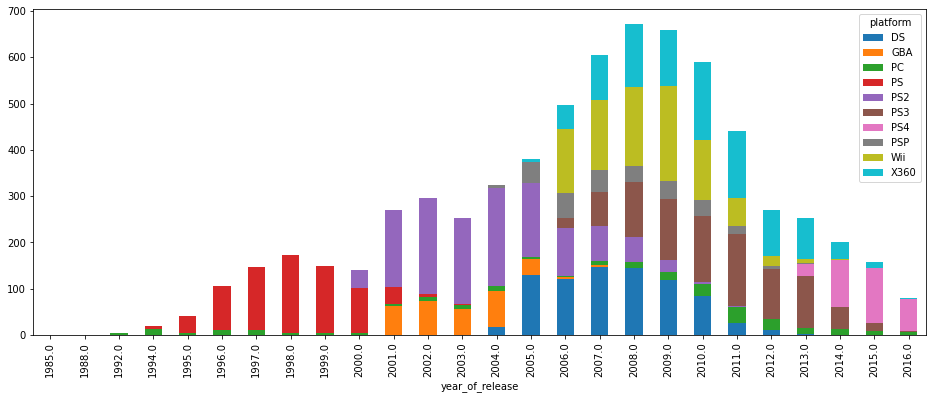

In [19]:
# Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano.
top_10_platforms = sales_rank_platforms.iloc[0:10]['platform']
platform_sales_by_year = games_data[games_data['platform'].isin(top_10_platforms)].groupby(['year_of_release','platform'])['total_sales'].sum()
platform_sales_by_year.unstack().plot.bar(stacked=True, figsize=(16,6))

#### Plataformas Populares que não são mais vendidas

In [20]:
# Encontre as plataformas que costumavam ser populares, mas agora não têm vendas.
# Total de vendas de cada plataforma por ano
platform_sales_by_year = games_data.groupby(['year_of_release','platform'])['total_sales'].sum()
platform_sales_by_year = platform_sales_by_year.reset_index()

# Filtrando as plataformas que tiveram jogos vendidos em 2016
salings_platforms = platform_sales_by_year[(platform_sales_by_year['year_of_release'] == 2016)]['platform']

# Filtrando as plataformas que não estavam na lista de plataformas de 2016
discontinued_platforms = platform_sales_by_year[~platform_sales_by_year['platform'].isin(salings_platforms)]['platform'].unique()

# Criando a coluna 'rank' para saber que posição de vendas uma plataforma ocupou em cada ano
platform_sales_by_year['rank'] = platform_sales_by_year.groupby('year_of_release')['total_sales'].rank(ascending=False, method='min').astype(int)

#Filtrando plataformas que já estiveram entre as 3 mais vendidas em algum ano
popular_platforms = platform_sales_by_year[platform_sales_by_year['rank'].isin([1, 2, 3])]['platform'].unique()

# Com as informações das plataformas que não vendem e as que já foram populares geramos a lista com a informação
discontinued_pop_platforms = list(set(discontinued_platforms) & set(popular_platforms))

print("Plataformas populares que não tem vendas:", ', '.join(discontinued_pop_platforms))


Plataformas populares que não tem vendas: PS, GB, PS2, GBA, XB, GC, DS, NES, SNES, N64, GEN, 2600, SAT


#### Quanto tempo leva para um plataforma desaparecer

In [21]:
# Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
# Função para achar o ano do primeiro jogo de uma plataforma
def get_launch_year(platform):
    year = games_data[games_data['platform'] == platform]['year_of_release'].min()    
    return year

#Função para achar o último ano de lançamento de um jogo para uma plataforma
def get_last_year(platform):
    year = games_data[games_data['platform'] == platform]['year_of_release'].max()    
    return year

In [22]:
# Dataframe que contem que o tempo de vida de uma plataforma
platform_launch_end = pd.DataFrame()
platform_launch_end['platform'] = games_data['platform'].unique()
platform_launch_end['launch'] = platform_launch_end['platform'].apply(get_launch_year)
platform_launch_end['last_year'] = platform_launch_end['platform'].apply(get_last_year)
platform_launch_end['total_life'] = platform_launch_end['last_year'] - platform_launch_end['launch']
platform_launch_end

,platform,launch,last_year,total_life
0,Wii,2006.0,2016.0,10.0
1,NES,1983.0,1994.0,11.0
2,GB,1988.0,2001.0,13.0
3,DS,1985.0,2013.0,28.0
4,X360,2005.0,2016.0,11.0
5,PS3,2006.0,2016.0,10.0
6,PS2,2000.0,2011.0,11.0
7,SNES,1990.0,1999.0,9.0
8,GBA,2000.0,2007.0,7.0
9,PS4,2013.0,2016.0,3.0


In [23]:
# Tempo para uma plataforma desaparecer
# Devido à presença de outliers, como PC que tem uma vida útil que não vai acabar 
#e plataformas que só tem registro de vendas em um ano, a mediana será utilizar para calcular o tempo de vida de uma plataforma
print(f"Uma plataforma leva por volta de {platform_launch_end['total_life'].median()} anos para desaparecer")

Uma plataforma leva por volta de 6.0 anos para desaparecer


#### Filtrando os anos relevantes do conjunto de dados para modelar 2017

[Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores.]<br>
Para criar um modelo para 2017, vou pegar os dados de 2012 para frente, tendo em vista que as vendas começaram a diminuir nesse período e 2011 ainda teve um número alto de vendas que podem influenciar no modelo do futuro. 5 anos já é mais ou menos a metade da vida de uma plataforma e a tendencia já é perceptível.

[Os dados te deveriam permitir construir um modelo para 2017.]

[Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.]

In [24]:
# Selecionando dados de 2012-2016
games_data_filtered = games_data[games_data['year_of_release'] > 2011]

In [25]:
# Quais plataformas estão liderando em vendas?
hottest_platforms = games_data_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
hottest_platforms

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

#### Plataformas que estão crescendo ou diminuindo

##### Em números totais de venda

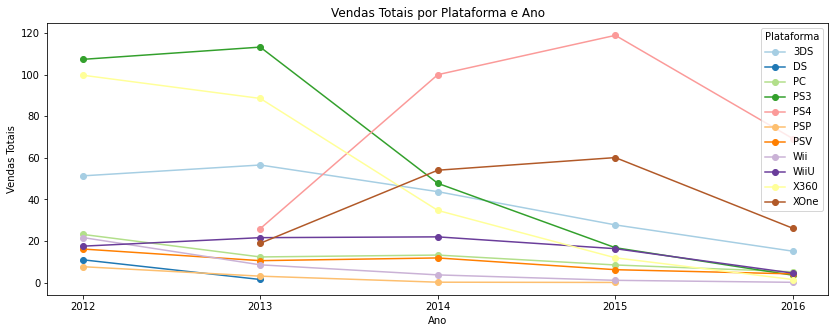

In [26]:
# Quais estão crescendo ou diminuindo?
sales_evolution = games_data_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum()
sales_evolution = sales_evolution.reset_index()
sales_evolution['year_of_release'] = sales_evolution['year_of_release'].astype(int)
years = [2012, 2013, 2014, 2015, 2016]

# Pivotando os dados para que as plataformas se tornem colunas
table_sales = sales_evolution.pivot(index='year_of_release', columns='platform', values='total_sales')

# Plotando o gráfico
ax = table_sales.plot(marker='o', colormap='Paired', figsize=(14,5))

# Personalizando o gráfico
plt.title('Vendas Totais por Plataforma e Ano')
plt.xlabel('Ano')
plt.xticks(years)
plt.ylabel('Vendas Totais')
plt.legend(title='Plataforma')


# Exibindo o gráfico
plt.show()

##### Em relação às outras plataformas

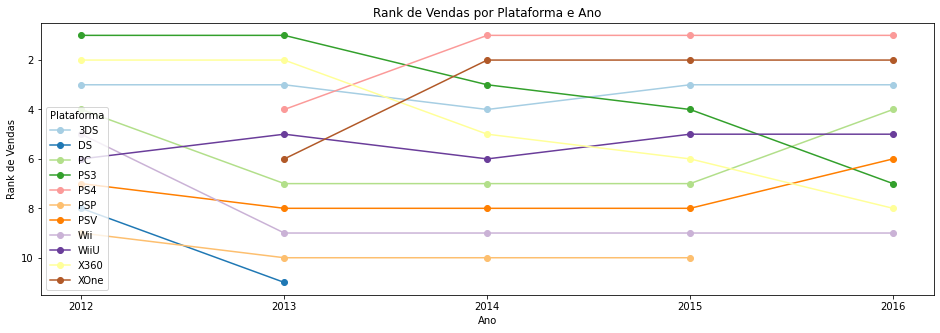

In [27]:
# Calculando a posição de cada plataforma em cada ano
sales_evolution['rank'] = sales_evolution.groupby('year_of_release')['total_sales'].rank(ascending=False, method='min').astype(int)

# Criando um DataFrame pivotado para o gráfico de barras agrupadas
table_rank = sales_evolution.pivot(index='year_of_release', columns='platform', values='rank')

# Plotando o gráfico de barras agrupadas
ax = table_rank.plot(marker='o', linestyle='-', colormap='Paired', figsize=(16,5))
ax.invert_yaxis()
# Personalizando o gráfico
plt.title('Rank de Vendas por Plataforma e Ano')
plt.xlabel('Ano')
plt.xticks(years)
plt.ylabel('Rank de Vendas')
plt.legend(title='Plataforma')


# Exibindo o gráfico
plt.show()

In [28]:
# Selecione várias plataformas potencialmente lucrativas.
table_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Todas as plataformas tiveram queda nas vendas em 2016, mas considerando a posição no rank e o histórico de plataformas, as plataformas potencialmente lucrativas são PS4, Xbox One, 3DS e PC.

#### Gráfico Vendas plataformas

##### Boxplot das Plataformas

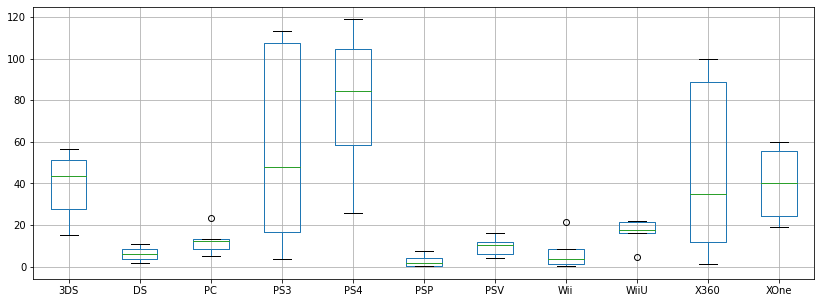

In [29]:
# Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. 
plt.subplots(figsize=(14,5))
table_sales.boxplot()
plt.show()

[As diferenças nas vendas são significativas?]<br>
A diferença entre as plataformas é significativa, as plataformas mais velhas têm caixas maiores que suas sucessoras, devido a estarem no final do ciclo de vida e também do mercado estar mais aquecido no ápice delas.

[E quanto às vendas médias em várias plataformas? Descreva suas descobertas.] <br>
As vendas médias são diferentes também, mas a diferença é muito menor, o público de determinada plataforma parece se manter na mesma plataforma mudando apenas a geração. Com exceção do Xbox 360 e Xbox One que teve uma queda brusca na média de vendas.

##### Gráfico de dispersão avaliações de usuários e profissionais

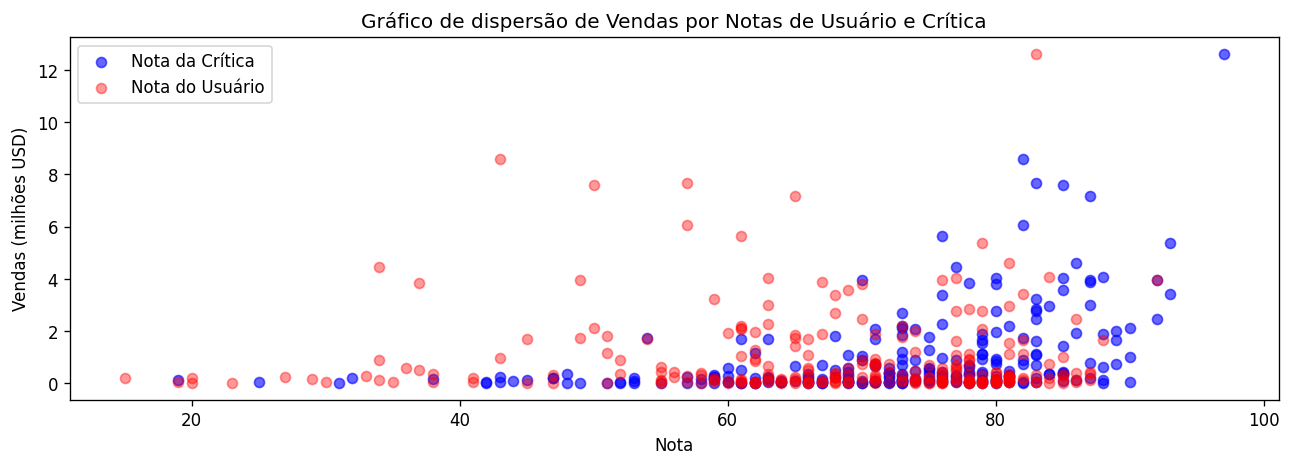

In [30]:
# Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe).

# Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

ps4_sales = games_data[games_data['platform'] == 'PS4']
plt.subplots(figsize=(13,4), dpi=120)
plt.scatter(ps4_sales['critic_score'], ps4_sales['total_sales'], color='blue', 
            label='Nota da Crítica', alpha=0.6)
plt.scatter(ps4_sales['user_score']*10, ps4_sales['total_sales'], color='red', 
            label='Nota do Usuário', alpha=0.4)
plt.title('Gráfico de dispersão de Vendas por Notas de Usuário e Crítica')
plt.xlabel('Nota')
plt.ylabel('Vendas (milhões USD)')

plt.legend()

plt.show()

In [31]:
print('Correlação entre vendas e Nota do usuário: ', ps4_sales['total_sales'].corr(ps4_sales['user_score']))
print('Correlação entre vendas e Nota da crítica: ',ps4_sales['total_sales'].corr(ps4_sales['critic_score']))

Correlação entre vendas e Nota do usuário:  -0.031957110204556424
Correlação entre vendas e Nota da crítica:  0.406567902061781


Levando em conta os dados para a plataforma PS4, o gráfico e o valor de correlação anteriores demostram que a nota dos críticos tem uma boa correlação com as vendas de um jogo, porém a avaliação dos usuários não tem uma interferência relevante na venda de um jogo.

##### Gráfico de venda de jogos em diferentes plataformas

In [32]:
# Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.
# Agrupando os dados de vendas para um jogo e a plataforma onde ele está
games_platform_sales = games_data.groupby(['name', 'platform'])['total_sales'].sum()
games_platform_sales = games_platform_sales.reset_index()



In [33]:
# Selecionando as plataformas da análise
platforms = ['PS4', 'XOne', '3DS']

# Filtrando os jogos que estão presentes nas plataformas desejadas
filtered_data = games_platform_sales[games_platform_sales['platform'].isin(platforms)]

# Contador de plataformas únicas para cada jogo
platform_counts = filtered_data.groupby('name')['platform'].nunique()

#Jogos que estão em todas as plataformas desejadas
games_in_all_platforms = platform_counts[platform_counts == len(platforms)].index.tolist()

# Dataframe filtrado apenas com os jogos em todas as plataformas desejadas
games_cross_platforms = games_platform_sales[games_platform_sales['name'].isin(games_in_all_platforms)]

games_cross_platforms = games_cross_platforms[games_cross_platforms['platform'].isin(platforms)]


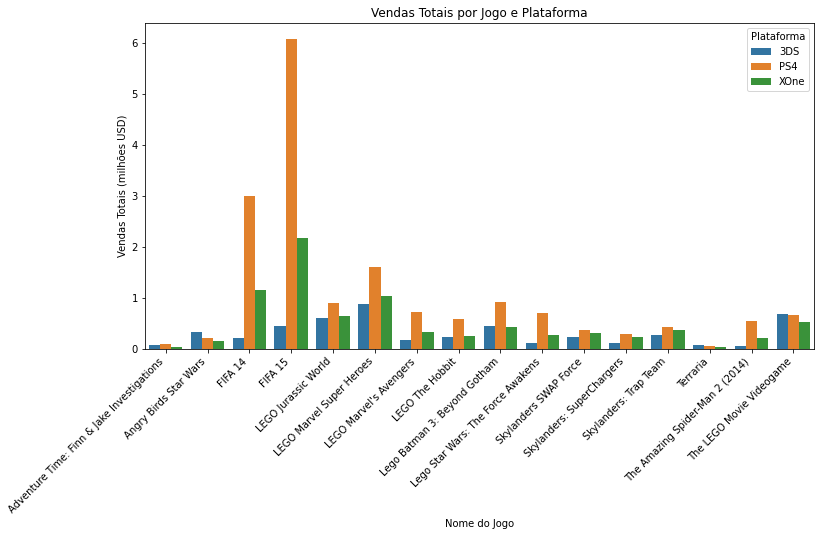

In [34]:
# Gráfico com as vendas dos jogos presentes em todas as plataformas selecionadas
plt.figure(figsize=(12, 6))
sns.barplot(data=games_cross_platforms, x='name', y='total_sales', hue='platform', ci=None)

# Personalizando o gráfico
plt.title('Vendas Totais por Jogo e Plataforma')
plt.xlabel('Nome do Jogo')
plt.ylabel('Vendas Totais (milhões USD)')
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.legend(title='Plataforma')

# Exibindo o gráfico
plt.show()

Em geral um jogo vende mais no PS4, com o Xbox One ficando em segundo lugar e por último o 3DS

### Análise por gênero do jogo

In [35]:
# Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? 
# Você pode generalizar sobre gêneros com vendas altas e baixas?
games_per_genre = games_data.groupby('genre')['name'].count().sort_values(ascending=False)
games_per_genre = games_per_genre.reset_index()
games_per_genre.rename(columns={'name': 'total_launch'}, inplace=True)

sales_rank_genres = games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
sales_rank_genres = sales_rank_genres.reset_index()
sales_rank_genres = sales_rank_genres.merge(games_per_genre, how='inner', on='genre')
sales_rank_genres

,genre,total_sales,total_launch
0,Action,1744.17,3369
1,Sports,1331.27,2348
2,Shooter,1052.45,1323
3,Role-Playing,934.56,1498
4,Platform,827.77,888
5,Misc,802.51,1750
6,Racing,728.67,1249
7,Fighting,447.53,849
8,Simulation,389.97,873
9,Puzzle,242.57,580


Os dois gêneros de jogos mais vendidos também são os que possuem mais jogos lançados, mas em relação ao restante dos gêneros não há uma uniformidade entre o número de jogos e a lucratividade.

### Análise por Região

Crie um perfil de usuário para cada região <br>
Para cada região (AN, UE, JP), determine: <br>
•	As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.<br>
•	Os cinco principais gêneros. Explique a diferença.<br>
•	As classificações do ESRB afetam as vendas em regiões individuais?<br>


In [36]:
# Definindo uma classe com os atributos necessários para a análise de cada região
class Region:
    def __init__(self, name, df, region_sales):
        """ Classe com os atributos necesários para analisar uma região"""
        self.name = name # Nome da Região
        self.sales = df[region_sales].sum() # Total de vendas na região
        # Método para filtrar do Dataframe apenas os dados da Região
        self.set_market(df, region_sales)
        # Método para extrair as 5 principais plataformas da região
        self.set_main_platforms(df, region_sales)
        # Método para extrair os 5 principais gêneros da região
        self.set_main_genres(df, region_sales)       
    
    def set_market(self, df, region_sales):
        # Filtra quais jogos tiveram alguma venda na região
        self.market = df[df[region_sales]>0]
        # Elimina as colunas que contem as informações sobre os valores de outras regiões
        self.drop_columns = df.columns[df.columns.str.contains('_sales')]
        self.drop_columns = self.drop_columns.drop(region_sales)
        self.market = self.market.drop(columns=self.drop_columns)
        
        
    def set_main_platforms(self, df, region_sales):
        self.main_platforms = self.market.groupby('platform')[region_sales].sum().sort_values(ascending=False).head()
        self.main_platforms = self.main_platforms.reset_index()
        self.main_platforms['share'] = self.main_platforms[region_sales]/self.sales
        
    def set_main_genres(self, df, region_sales):
        self.main_genres = self.market.groupby('genre')[region_sales].sum().sort_values(ascending=False).head()
        self.main_genres = self.main_genres.reset_index()
        self.main_genres['share'] = self.main_genres[region_sales]/self.sales

In [37]:
# Criar perfil de usuário para cada região
jp_profile = Region('Japão', games_data, 'jp_sales')
na_profile = Region('América do Norte', games_data, 'na_sales')
eu_profile = Region('Europa', games_data, 'eu_sales')

#### Plataformas

In [38]:
# Cinco plataformas principais de cada região
print('Principais Plataformas no Japão: \n', jp_profile.main_platforms)
print('---------------------------------------')
print('Principais Plataformas na América do Norte: \n', na_profile.main_platforms)
print('---------------------------------------')
print('Principais Plataformas na Europa: \n', eu_profile.main_platforms)

Principais Plataformas no Japão: 
   platform  jp_sales     share
0       DS    175.57  0.135328
1       PS    139.82  0.107772
2      PS2    139.20  0.107294
3     SNES    116.55  0.089836
4      3DS    100.67  0.077595
---------------------------------------
Principais Plataformas na América do Norte: 
   platform  na_sales     share
0     X360    602.47  0.136852
1      PS2    583.84  0.132620
2      Wii    496.90  0.112872
3      PS3    393.49  0.089382
4       DS    382.40  0.086863
---------------------------------------
Principais Plataformas na Europa: 
   platform  eu_sales     share
0      PS2    339.29  0.139932
1      PS3    330.29  0.136221
2     X360    270.76  0.111669
3      Wii    262.21  0.108143
4       PS    213.61  0.088099


[Descreva as variações das quotas de mercado de região para região] <br><br>
A região japonesa prefere as plataformas produzidas na própria região, tendo em vista que os 5 primeiros lugares são de fabricantes japonesas. Outra caracteristica da região é que todas as plataformas presentes no top5 são mais antigas, por exemplo o SNES só aparece nessa região e o DS é a plataforma mais popular.<br><br>
A região da América do norte tem uma predominância de Xbox 360 e PS2, foram as plataformas mais populares no período em que o mercado teve as maiores vendas, mas o mercado não é dominado por nenhum fabricante. <br><br>
A região europeia tem uma predominância das plataformas da playstation, sendo que as 3 primeiras gerações aparecem no top5, com o PS2 e o PS3 em primeiro e segundo respectivamente. O Xbox 360 e o Nintendo Wii aparecem bem também, a região tem uma preferência por plataformas mais atuais em relação ao Japão e a América do Norte, porém as últimas gerações não apareceram, por estarem no meio do ciclo de vida médio e também pelas vendas no mercado de jogos ter caído.

#### Gêneros

In [39]:
# Cinco principais gêneros de cada região
print('Principais Gêneros no Japão: \n', jp_profile.main_genres)
print('---------------------------------------')
print('Principais Gêneros na América do Norte: \n', na_profile.main_genres)
print('---------------------------------------')
print('Principais Gêneros na Europa: \n', eu_profile.main_genres)

Principais Gêneros no Japão: 
           genre  jp_sales     share
0  Role-Playing    355.41  0.273947
1        Action    161.43  0.124429
2        Sports    135.54  0.104473
3      Platform    130.83  0.100842
4          Misc    108.11  0.083330
---------------------------------------
Principais Gêneros na América do Norte: 
       genre  na_sales     share
0    Action    879.01  0.199668
1    Sports    684.43  0.155469
2   Shooter    592.24  0.134528
3  Platform    445.50  0.101196
4      Misc    407.27  0.092512
---------------------------------------
Principais Gêneros na Europa: 
      genre  eu_sales     share
0   Action    519.13  0.214103
1   Sports    376.79  0.155398
2  Shooter    317.34  0.130880
3   Racing    236.51  0.097543
4     Misc    212.74  0.087740


[Explique a diferença]<br>
A região japonesa tem o gosto mais diferente, com o gênero Role-playing estando em primeiro lugar e com quase 30% do mercado, e também ser a única região onde esse gênero aparece.<br>
As regiões da Europa e da América do Norte tem gosto mais similares, com a ordem dos gêneros idênticas, com exceção da 4 posição que são gêneros diferentes.<br>
Independente da região os gêneros de Ação e Esportes performam bem.<br>
O gênero de corrida aparece apenas na Europa<br>
Jogos de plataforma conseguem ter bom sucesso tanto no Japão quanto na América do Norte, com 10% do mercado em cada região.

#### Classificações ESRB

In [40]:
# Verificar como as classificações ESRB afetam as vendas em cada região
jp_market = jp_profile.market
jp_market = jp_market.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(jp_market)
print('-----------------------------------')
na_market = na_profile.market
na_market = na_market.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(na_market)
print('-----------------------------------')

eu_market = eu_profile.market
eu_market = eu_market.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(eu_market)

rating
RP      841.96
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64
-----------------------------------
rating
E       1292.99
RP      1242.46
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
Name: na_sales, dtype: float64
-----------------------------------
rating
E       710.25
RP      613.91
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
Name: eu_sales, dtype: float64


Jogos com classificação livre são os jogos mais populares em todas as regiões, porém no mercado japonês existem muitos jogos sem classificação, mais que todos os jogos classificados somados, tornando díficil avaliar como a classificação afeta essa região especificamente.<br>
Nas regiões da Europa e América do Norte, os jogos com classificação para adolescente e maduro estão em segundo e terceiro lugares, mas invertem suas posições, sendo que na Europa os maduros são preferidos e na América do Norte os adolescente, mas a diferença entre essas classificações é pequena, após elas vem a classificação para acima de 10 anos e depois classificações com nichos específicos. Isso mostra que os jogos nichados para faixas etárias muito específicas performam pior que jogos mais abrangentes.

## Testes de Hipóteses

Hipóteses a ser testadas:<br>
— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.<br>
— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. <br>
Defina o valor do limiar *alfa** você mesmo.<br>
Explique:<br>
— Como você formula as hipóteses alternativas e nulas.<br>
— Quais critérios você usou para testar as hipóteses, e por quê<br>



### Hipótese 1
Hipótese nula = As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas <br>
Hipótese alternativa = As classificações médias dos usuários das plataformas Xbox One e PC são diferentes

In [41]:
# Filtrar as notas de Xbox One e de PC
games_rated = games_data[~games_data['user_score'].isna()]
xone_ratings = games_rated[games_rated['platform'] == 'XOne']['user_score']
pc_ratings = games_rated[games_rated['platform'] == 'PC']['user_score']

In [42]:
#Limite de 5% para aceitar a hipótese nula, para cima ou para baixo
alpha = 0.05

#Teste Levene para suposição de igualdade das variâncias
users_ratings_l_test = st.levene(xone_ratings, pc_ratings, center='mean')

print('valor-p: ', users_ratings_l_test.pvalue) # extraindo o valor-p

if users_ratings_l_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula de Levene")
else:
    print("Não rejeitamos a hipótese nula de Levene") 


valor-p:  0.07549452472407711
Não rejeitamos a hipótese nula de Levene


In [43]:
#Realizando Teste T com equal_var=True
user_ratings_t_test = st.ttest_ind(xone_ratings, pc_ratings, equal_var=True)


print('valor-p: ', user_ratings_t_test.pvalue) # extraindo o valor-p

if user_ratings_t_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.3896435533548819e-05
Rejeitamos a hipótese nula


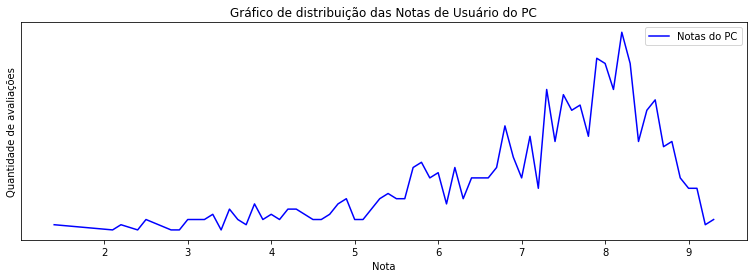

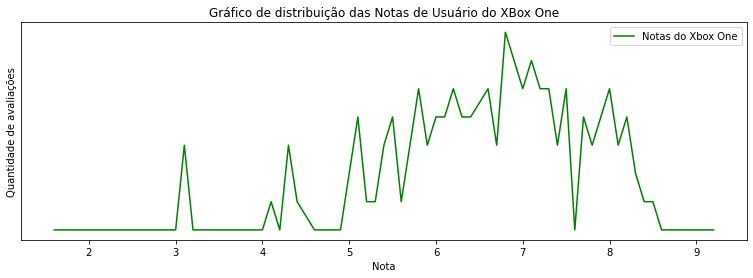

In [44]:
xone_sorted = xone_ratings.value_counts().reset_index().sort_values(by='index')
pc_sorted = pc_ratings.value_counts().reset_index().sort_values(by='index')

plt.subplots(figsize=(13,4))
plt.title('Gráfico de distribuição das Notas de Usuário do PC')
plt.xlabel('Nota')
plt.ylabel('Quantidade de avaliações')
plt.plot(pc_sorted['index'], pc_sorted['user_score'], color='blue', 
            label='Notas do PC')
plt.yticks([])
plt.legend()
plt.show()
plt.subplots(figsize=(13,4))
plt.title('Gráfico de distribuição das Notas de Usuário do XBox One')
plt.xlabel('Nota')
plt.ylabel('Quantidade de avaliações')
plt.yticks([])
plt.plot(xone_sorted['index'], xone_sorted['user_score'], color='green', 
            label='Notas do Xbox One')


plt.legend()

plt.show()

Os jogos de PC tem uma avaliação melhor dos usuários que os jogos de Xbox One. A hipótese partiu do príncipio que as plataformas tem a mesma avaliação. Ambas plataformas são do mesmo fabricante, mas ao analisar a média das notas com um alpha de 5% para cima ou para baixo vimos que não é possível afirmar que elas tem as mesmas classificações pelos usuários.

### Hipótese 2
As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.<br>
Hipótese nula: As classificações médias de usuários para os gêneros Action e Sports são iguais.<br>
Hipótese alternativa: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [45]:
action_ratings = games_rated[games_rated['genre'] == 'Action']['user_score']
sports_ratings = games_rated[games_rated['genre'] == 'Sports']['user_score']

In [46]:
#Limite de 5% para aceitar a hipótese nula, para cima ou para baixo
alpha = 0.05

#Teste Levene para suposição de igualdade das variâncias
users_genre_ratings_l_test = st.levene(action_ratings, sports_ratings, center='mean')

print('valor-p: ', users_genre_ratings_l_test.pvalue) # extraindo o valor-p

if users_genre_ratings_l_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula de Levene")
else:
    print("Não rejeitamos a hipótese nula de Levene") 

valor-p:  5.355232768512743e-06
Rejeitamos a hipótese nula de Levene


In [47]:
#Realizando Teste T com equal_var=True
users_genre_ratings_t_test = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)


print('valor-p: ', users_genre_ratings_t_test.pvalue) # extraindo o valor-p

if users_genre_ratings_t_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  4.935072360183565e-06
Rejeitamos a hipótese nula


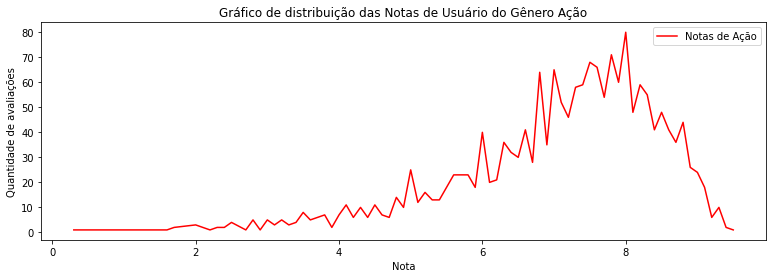

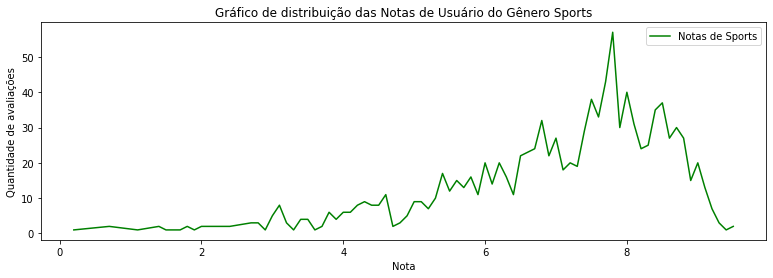

In [48]:
action_sorted = action_ratings.value_counts().reset_index().sort_values(by='index')
sports_sorted = sports_ratings.value_counts().reset_index().sort_values(by='index')

plt.subplots(figsize=(13,4))
plt.title('Gráfico de distribuição das Notas de Usuário do Gênero Ação')
plt.xlabel('Nota')
plt.ylabel('Quantidade de avaliações')
plt.plot(action_sorted['index'], action_sorted['user_score'], color='red', 
            label='Notas de Ação')
#plt.yticks([])
plt.legend()
plt.show()
plt.subplots(figsize=(13,4))
plt.title('Gráfico de distribuição das Notas de Usuário do Gênero Sports')
plt.xlabel('Nota')
plt.ylabel('Quantidade de avaliações')
#plt.yticks([])
plt.plot(sports_sorted['index'], sports_sorted['user_score'], color='green', 
            label='Notas de Sports')


plt.legend()

plt.show()

Os jogos de Ação tem uma avaliação melhor dos usuários que os jogos de Esportes. A hipótese partiu do príncipio que os gêneros tem uma avaliação diferente. São os gêneros mais populares, sendo Ação o mais popular, mas ao fazer o Teste T com um alpha de 5% para cima ou para baixo vimos que é possível afirmar que elas tem classificações diferentes pelos usuários.

## Conclusão

Analisando os dados e projetando o melhor lançamento para 2017, o jogo com mais probabilidade de lucro deve ser desenvolvido para a plataforma PS4, do gênero Ação, com rating ESRB 'E' e com projeção de boa recepção nos mercados japonês, norte americano e europeu. Desenvolver um jogo para Xbox One, ou de Esporte, ou com classificação 'T' ou 'M' também seria um bom investimento. O mercado desacelerou nos últimos anos, mas essas plataformas, gêneros e classificações ainda tem expectativa de um bom retorno para o desenvolvedor.